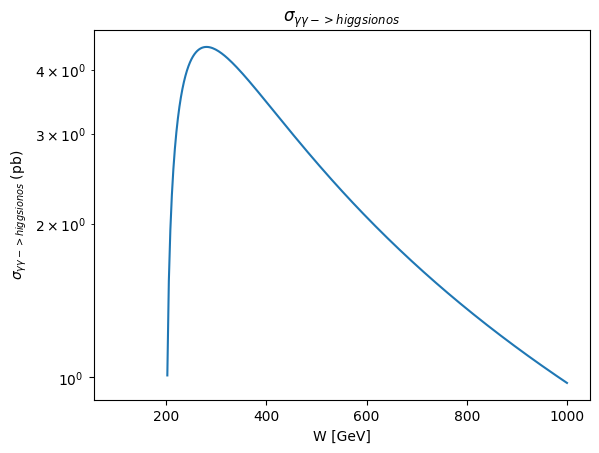

In [3]:
import numpy as np

import matplotlib.pyplot as plt

import math

# Generate x values from 0 to 2*pi
wvalue = np.linspace(100, 1000, 300)

##################################################################

def cs_higgsionos_w_condition(wvalue):
    re = 2.8179403262e-15 * 137.0 / 128.0  
    me = 0.510998950e-3
    mhiggsionos = 100.0
    hbarc2 =  0.389
    alpha2 = (1.0/137.0)*(1.0/137.0)

    # Element-wise calculation of beta using np.where
    beta = np.sqrt(np.where(1.0 - 4.0 * mhiggsionos * mhiggsionos / wvalue**2.0 >= 0, 1.0 - 4.0 * mhiggsionos * mhiggsionos / wvalue**2.0, np.nan))

    # Element-wise calculation of cs using np.where
    cs = np.where(wvalue > mhiggsionos, (4.0 * np.pi * alpha2 * hbarc2 ) / wvalue**2.0 * (beta) * \
             ( (3.0 - (beta**4.0))/(2.0 * beta) * np.log((1.0+beta)/(1.0-beta)) - 2.0 + beta**2.0), 0.) * 1e9

    return cs


##################################################################


# Calculate y values using cs_DM_w function
y = cs_higgsionos_w_condition(wvalue)
#y = cs_DM_w(wvalue)

# Create a figure and axes
fig, ax = plt.subplots()

# Plot the data
ax.plot(wvalue, y)

ax.set_yscale("log")

# Customize the plot
ax.set_xlabel('W [GeV]')
ax.set_ylabel('$\sigma_{\gamma \gamma -> higgsionos}$ (pb)')
ax.set_title('$\sigma_{\gamma \gamma ->  higgsionos}$')

# Save the plot as a PDF file
plt.savefig('cs_higgsionos_w_plot.pdf')
plt.savefig('cs_higgsionos_w_plot.jpg')

# Show the plot
plt.show()
